https://www.kaggle.com/datasets/saurabh00007/diabetescsv

Загрузить файл с информацией о диабетах и построить модель классификации на основе имеющихся данных.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


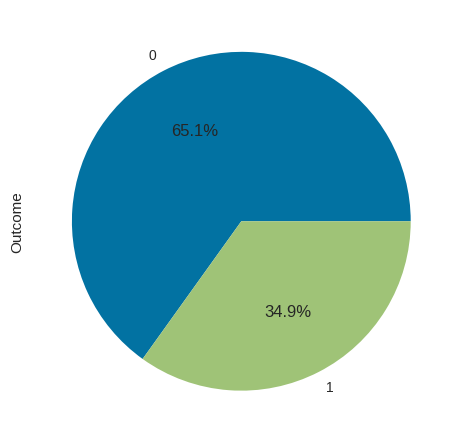

In [ ]:
import matplotlib.pyplot as plt

df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Целевая переменная не сбалансирована, могут быть проблемы при обучении.

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X.shape,y.shape

((768, 8), (768,))

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, roc_curve,f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
y_train=np.vstack(y_train).astype(np.float64)
y_test=np.vstack(y_test).astype(np.float64)


X_train, y_train, X_test, y_test = torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32), torch.tensor(X_test.values, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)


In [ ]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 20

train_dl = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size)

test_dl = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
model = nn.Sequential(
    nn.Linear(8,10),
    nn.LeakyReLU(),
    nn.Linear(10,1),
    nn.Sigmoid()
)


In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.RMSprop(model.parameters())
train_losses = []
test_losses = []

# Обучение модели
for epoch in range(50):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_dl):
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs)
        loss = criterion(outputs.squeeze(), labels.squeeze())
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_dl)))

Epoch 1 loss: 1.060
Epoch 2 loss: 0.500
Epoch 3 loss: 0.496
Epoch 4 loss: 0.495
Epoch 5 loss: 0.496
Epoch 6 loss: 0.494
Epoch 7 loss: 0.494
Epoch 8 loss: 0.492
Epoch 9 loss: 0.490
Epoch 10 loss: 0.492
Epoch 11 loss: 0.490
Epoch 12 loss: 0.491
Epoch 13 loss: 0.490
Epoch 14 loss: 0.490
Epoch 15 loss: 0.489
Epoch 16 loss: 0.486
Epoch 17 loss: 0.487
Epoch 18 loss: 0.486
Epoch 19 loss: 0.489
Epoch 20 loss: 0.484
Epoch 21 loss: 0.482
Epoch 22 loss: 0.482
Epoch 23 loss: 0.484
Epoch 24 loss: 0.485
Epoch 25 loss: 0.482
Epoch 26 loss: 0.481
Epoch 27 loss: 0.482
Epoch 28 loss: 0.481
Epoch 29 loss: 0.480
Epoch 30 loss: 0.479
Epoch 31 loss: 0.477
Epoch 32 loss: 0.478
Epoch 33 loss: 0.474
Epoch 34 loss: 0.475
Epoch 35 loss: 0.477
Epoch 36 loss: 0.477
Epoch 37 loss: 0.474
Epoch 38 loss: 0.471
Epoch 39 loss: 0.531
Epoch 40 loss: 0.473
Epoch 41 loss: 0.471
Epoch 42 loss: 0.469
Epoch 43 loss: 0.467
Epoch 44 loss: 0.481
Epoch 45 loss: 0.470
Epoch 46 loss: 0.467
Epoch 47 loss: 0.465
Epoch 48 loss: 0.489
E

In [ ]:
y_true, y_pred = [], []
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_dl:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

print('Accuracy: %.3f' % (correct / total))

f1_score(y_test,y_pred)
recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('ROC-AUC: %.3f' % roc_auc)
print('f1-score: %.3f' % roc_auc)
confusion_matrix(y_true, y_pred)

Accuracy: 0.805
Recall: 0.636
Precision: 0.778
ROC-AUC: 0.768
f1-score: 0.768


array([[89, 10],
       [20, 35]])

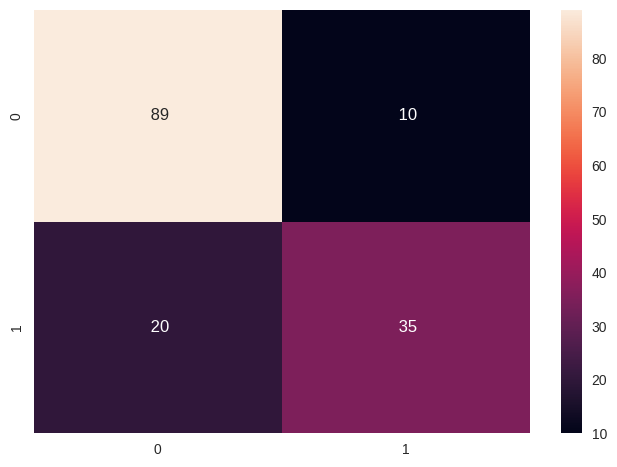

In [ ]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="3d");

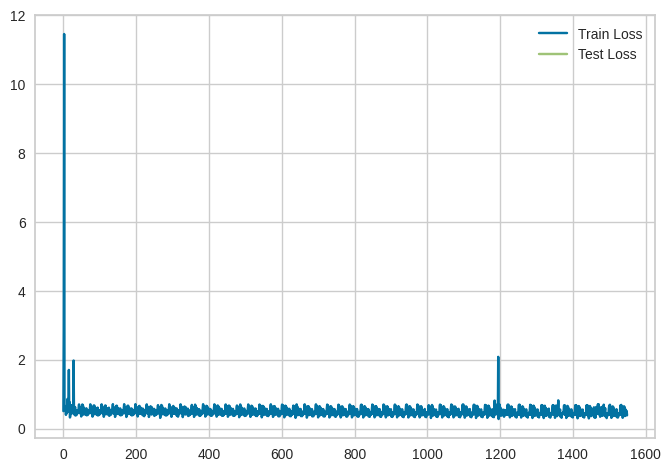

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()